In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import itertools
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sys import maxsize

In [2]:
# Reading the dataset and naming the columns as:
# Description and Category to which that description matches
df = pd.read_csv('ecommerceDataset.csv', names=["Category", "Description"])

1. EDA : Exploratory Data Analysis

In [3]:
# Looking at our dataframe
df.head()

,Category,Description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [4]:
# Our dataset consists of 50425 entries
df.shape

(50425, 2)

In [5]:
# Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     50425 non-null  object
 1   Description  50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [6]:
# Information about the NaN values over the entire dataset is given below.
print(df.isna().sum())

Category       0
Description    1
dtype: int64


In [7]:
# There is only one description with NaN value, so we can simply drop it
df = df[df['Description'].notna()]

In [8]:
# Keeping only those datapoints whose description is not NaN
print(df.isna().sum())

Category       0
Description    0
dtype: int64


In [9]:
# Bar Graph of the most common words in Product Description
# A bar graph of the 40 most frequent words occuring in the Product Description
# is made. This has helped us in adding some words to our stopwords 
# list like made, about, etc (which are then removed) as they
# do not have much meaning/contribution in the prediction of product category.

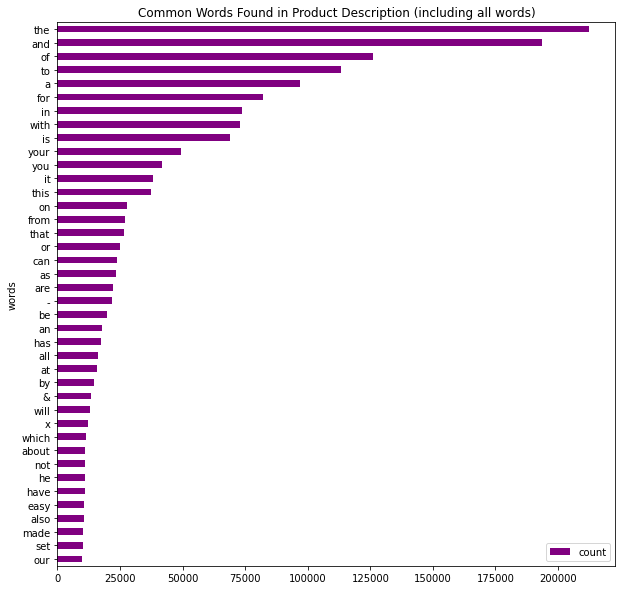

In [10]:
def most_frequent_words(description):

    for i in range(len(description)):
        description[i] = description[i].lower().split()

    all_words = list(itertools.chain(*description))
    word_counts = Counter(all_words)

    #creating a pandas dataframe of the 40 most common words in the dataset
    clean_description = pd.DataFrame(word_counts.most_common(40),
                                    columns=['words', 'count'])
    return clean_description

description = df["Description"].tolist()
most_common_description = most_frequent_words(description)

fig, ax = plt.subplots(figsize=(10, 10))
# plotting the bargraph in decreasing sorted order
most_common_description.sort_values(by='count').plot.barh(x='words',
                                                          y='count',
                                                          ax=ax,
                                                          color="purple")

ax.set_title("Common Words Found in Product Description (including all words)")
plt.show()

In [11]:
# Finding out the different categories 

categories_in_df = list(dict.fromkeys(list(df.loc[:,'Category'].values)))
print("The unique Product Categories in this dataset are {}".format(len(categories_in_df)))
set_categories = set(list(df['Category']))
set_categories

The unique Product Categories in this dataset are 4


{'Books', 'Clothing & Accessories', 'Electronics', 'Household'}

<AxesSubplot:title={'center':'Number of products in different categories'}, xlabel='Product Categories having frequency at least 10', ylabel='Frequency'>

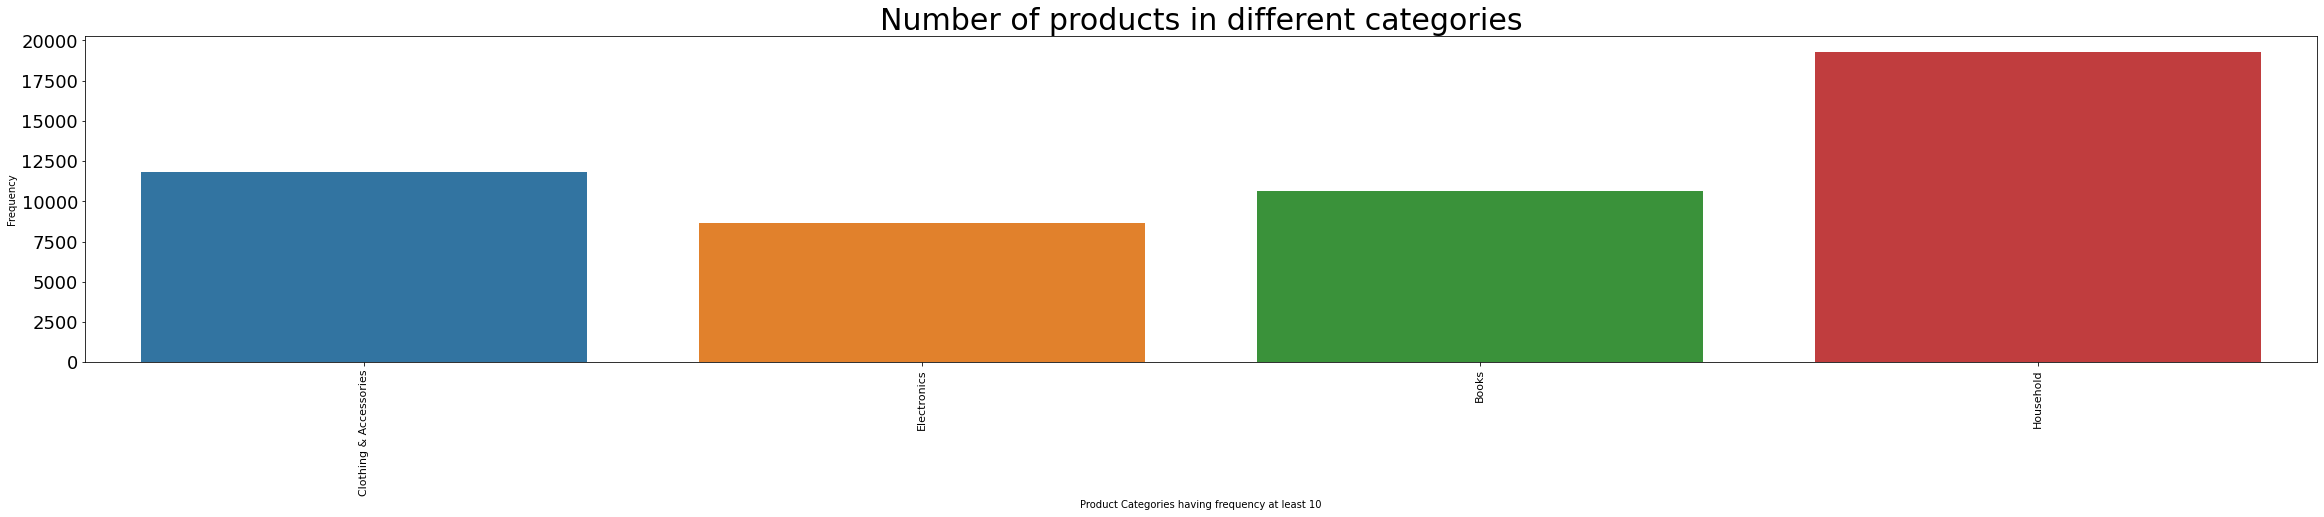

In [12]:
# Expressing the frequencies of all the categories as bar-graph

# count list denotes the frequency of all the categories
# count[0] denotes the frequency of 'Books'
# count[1] denotes the frequency of 'Clothing & Accessories'
# count[2] denotes the frequency of 'Electronics'
# count[3] denotes the frequency of 'Household'
count = [0,0,0,0]
for item in list(df['Category']):
    if(item == 'Books'):
        count[0] += 1
    elif(item == 'Electronics'):
        count[2] += 1
    elif(item == 'Household'):
        count[3] += 1
    else:
        count[1] += 1
        
plt.figure(figsize=(40,6))
plt.title("Number of products in different categories", fontsize=30)
plt.xlabel("Product Categories having frequency at least 10")
plt.ylabel("Frequency")
plt.xticks(fontsize=11,rotation=90)
plt.yticks(fontsize=18)
sns.barplot(x=list(set_categories), y=count)

In [13]:
# Text Length Analysis
# Analysis of the length of the Product Description is done to help us get an idea about the minimum, maximum and average length
# of the same. This is done in order to decide whether we have to discard some datapoints having text length less than or greater to a threshold.

In [14]:
#finding the length of the description
max_desc_len = -1
desc_len_sum = 0
min_desc_len = maxsize

product_description = df["Description"].tolist()

for i in range(len(product_description)):
    try:
        max_desc_len = max(max_desc_len,len(product_description[i]))
        min_desc_len = min(min_desc_len,len(product_description[i]))
        desc_len_sum+=len(product_description[i])
    except:
        pass

print("Max description length is {}.".format(max_desc_len))
print("Min description length is {}.".format(min_desc_len))
print("Average description length is {}.".format(desc_len_sum/len(product_description)))

Max description length is 50403.
Min description length is 4.
Average description length is 714.1123472949389.


In [16]:
# Word cloud consisting of the most frequent words in the Product Description

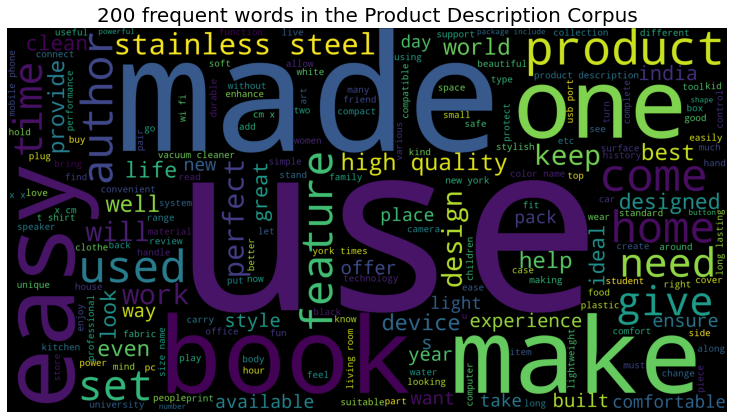

In [85]:
product_content = ""

for i in df["Description"]: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    product_content += " ".join(separate)+" "

stop_words = set(STOPWORDS)
final_wordcloud = WordCloud(width = 3000, height = 1600, 
                            max_words=200,
                            background_color ='black', 
                            stopwords = stop_words, 
                            min_font_size = 10).generate(product_content)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.title("200 frequent words in the Product Description Corpus", fontsize=20)
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [15]:
# Character Contraction

# Character contraction is done to look at what percentage of the dataset is in English Characters. Punctuations, numbers, hyperlinks, etc will all be removed during further cleaning of the dataset.

# During this analysis of the characters, we can see that there are several emoticons, letters from different languages (Hindi), etc that can be seen. These are then removed from the corpus.

In [16]:
import string
from string import ascii_letters, punctuation, digits
corpus = ' '.join(df['Description']).lower()
characters = Counter(corpus)
sorted(characters.items(), key=lambda i: i[1], reverse=True)

total=0
for i in ascii_letters+punctuation+digits:
    total+=characters[i]

print("The % of data consisting of only English Characters is {}.".format(100*total/len(' '.join(df['Description']))))
print("\n")
print(characters)

The % of data consisting of only English Characters is 83.02157053152926.


Counter({' ': 6005814, 'e': 3188039, 't': 2343670, 'a': 2303929, 'o': 2165125, 'i': 2115843, 's': 1908159, 'n': 1880069, 'r': 1877525, 'l': 1306720, 'h': 1117314, 'c': 1075375, 'd': 1065720, 'u': 877879, 'm': 740728, 'p': 721119, 'f': 647342, 'g': 616665, 'y': 530392, 'b': 489277, 'w': 456103, '.': 328663, 'v': 301282, ',': 292321, 'k': 278930, '-': 158462, '0': 121673, '1': 103915, 'x': 95512, ':': 81452, '2': 76293, ')': 54372, '(': 53218, '5': 52826, 'z': 51719, '3': 51460, 'j': 47812, 'q': 43307, '4': 40503, '/': 38207, '6': 33092, "'": 32977, '\t': 31197, '8': 30805, '"': 23709, '7': 22301, '9': 22061, '\xa0': 16245, '&': 14547, '’': 11173, '*': 9273, ';': 8241, '!': 6118, '|': 5630, '+': 5128, '”': 5042, '%': 4857, '“': 4668, '?': 4517, '—': 4273, '–': 2606, '#': 2324, '•': 1982, ']': 1982, '[': 1971, 'ा': 1466, '_': 1449, '}': 1381, '{': 1378, '‘': 1344, '…': 1260, 'र': 1189, '्': 1166, 'क': 1150, '>': 1

In [17]:
import re
# getting all the words ending an apostrophe and single letter
contractions = Counter(re.findall("[a-z]+'[a-z]+", corpus))
apostrophe_end = sorted(contractions.items(), key=lambda i: i[1], reverse=True)
print("\n")
print(apostrophe_end)

# getting all the words starting with a single letter and an apostrophe
contractions=Counter(re.findall("[a-z]'[a-z]+", corpus))
apostrophe_start = sorted(contractions.items(), key=lambda i: i[1], reverse=True)
print("\n")
print(apostrophe_start)

#getting all the URLS
urls = re.findall('\(*http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))*', corpus)
print("\n")
print(urls)



[("women's", 2835), ("it's", 2373), ("men's", 2201), ("don't", 1188), ("you're", 624), ("you'll", 564), ("world's", 507), ("won't", 464), ("that's", 384), ("girl's", 371), ("doesn't", 340), ("india's", 334), ("boy's", 323), ("what's", 254), ("there's", 251), ("can't", 248), ("children's", 229), ("one's", 182), ("today's", 179), ("i've", 177), ("he's", 174), ("you've", 164), ("they're", 154), ("kid's", 145), ("we've", 135), ("i'm", 132), ("baby's", 125), ("isn't", 116), ("kahneman's", 112), ("valentine's", 104), ("child's", 98), ("people's", 92), ("woman's", 87), ("father's", 83), ("let's", 79), ("america's", 76), ("mamma's", 76), ("author's", 72), ("we're", 68), ("here's", 67), ("she's", 67), ("life's", 67), ("monitor's", 65), ("master's", 63), ("man's", 61), ("mother's", 60), ("device's", 60), ("camera's", 60), ("manufacturer's", 57), ("china's", 57), ("user's", 56), ("book's", 56), ("chef's", 53), ("pc's", 53), ("you'd", 52), ("aren't", 50), ("didn't", 49), ("phone's", 49), ("item'

In [18]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

custom_contracts = {
    "women's" : "women",
    "men's" : "men",
    "girl's" : "girl",
    "boy's" : "boy",
    "don't" : "do not",
    "product's" : "product",
    "it's" : "its",
    "bra's" : "bras",
    "won't": "will not",
    "doesn't" : "does not",
    "l's" : " ",
    "n's" : " ",
    "y's" : " ",
    "n't" : "not",
    "r's" : "rs",
    "u're" : "your",
    "a's" : " ",
    "e's": " "
}

custom_stopwords = [w for w in set(stopwords.words("english"))]
custom_stopwords += list(punctuation)
stopwords_dataset = ["the","about","delivery","cash", "rs", "which", "easy", "details", "guarantee","free", "genuine", "have"]
custom_stopwords.extend(stopwords_dataset)
wordnet_lemmatizer = WordNetLemmatizer()

In [19]:
# In the following code snippet, the following things have been taken care of:

# Lowercasing
# Custom Contraction Mapping
# Keeping only the ascii characters in the corpus
# Removal of URLs/ Hyperlinks
# Removal of numbers and punctuations
# Custom Stopword Removal
# Lemmatization
# Removal of extra whitespaces

In [20]:
import nltk
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize

def clean(text):

    for i in range(len(text)):
        text[i] = text[i].lower()
        text[i] = text[i].replace("\n"," ")
        for keys,values in custom_contracts.items():
            text[i] = text[i].replace(keys,values)
        text[i] = re.sub("[a-z]'[a-z]+", " ", text[i])
        #removing the extra whitespaces
        text[i] = re.sub(' +', ' ', text[i])
        #keeping only the ascii characters -> handles emoticons, letters from other languages, etc
        text[i] = re.sub(r'[^\x00-\x7F]+',' ', text[i])
        #removing the urls
        text[i] = re.sub('[(]?http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F])/)*', ' ', text[i])
        text[i] = ''.join([j for j in text[i] if not j.isdigit()])
        text[i] = text[i].split()
        text[i] = ' '.join([word for word in text[i] if word not in custom_stopwords])
        #removing the punctuations
        text[i] = re.sub(r'[^\w\s]', '', text[i])
        #lemmatization
        text[i] = [wordnet_lemmatizer.lemmatize(w) for w in word_tokenize(text[i])]
        #removing the words which have a length less than 3
        text[i] = [word for word in text[i] if len(word)>=3]

    return text

raw_description = df["Description"].tolist()
cleaned_description = clean(raw_description)
print(cleaned_description[:5])

[nltk_data] Downloading package omw-1.4 to C:\Users\SAUMYA
[nltk_data]     GUPTA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[['paper', 'plane', 'design', 'framed', 'wall', 'hanging', 'motivational', 'office', 'decor', 'art', 'print', 'inch', 'set', 'painting', 'made', 'synthetic', 'frame', 'textured', 'print', 'give', 'multi', 'effect', 'attracts', 'towards', 'special', 'series', 'painting', 'make', 'wall', 'beautiful', 'give', 'royal', 'touch', 'painting', 'ready', 'hang', 'would', 'proud', 'posse', 'unique', 'painting', 'niche', 'apart', 'use', 'modern', 'efficient', 'printing', 'technology', 'print', 'ink', 'precision', 'epson', 'roland', 'printer', 'innovative', 'printing', 'technique', 'result', 'durable', 'spectacular', 'looking', 'print', 'highest', 'last', 'lifetime', 'print', 'solely', 'topnotch', 'ink', 'achieve', 'brilliant', 'true', 'colour', 'due', 'high', 'level', 'resistance', 'print', 'retain', 'beautiful', 'colour', 'many', 'year', 'add', 'colour', 'style', 'living', 'space', 'digitally', 'printed', 'painting', 'pleasure', 'eternal', 'blissso', 'bring', 'home', 'elegant', 'print', 'lushed',

<AxesSubplot:title={'center':'40 Most Common Words relevant to Dataset'}, xlabel='Frequency', ylabel='Words'>

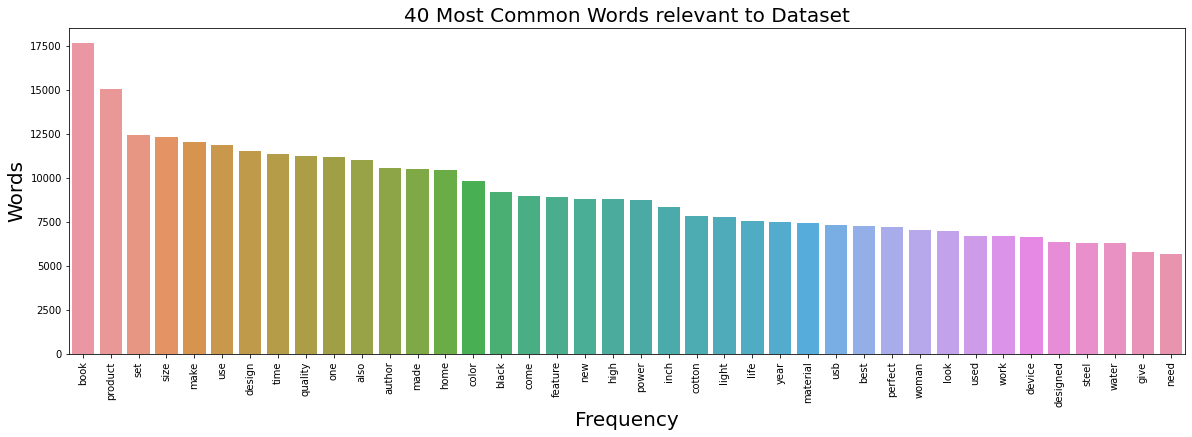

In [21]:
corpus = []
for text in cleaned_description:
    for word in text:
        corpus.append(word)

counter = Counter(corpus)
most=counter.most_common()
x, y = [], []
for word,count in most[:40]:
    if (word not in custom_stopwords):
        x.append(word)
        y.append(count)

plt.figure(figsize=(20,6))
plt.title("40 Most Common Words relevant to Dataset", fontsize=20)
plt.ylabel("Words", fontsize=20)
plt.xlabel("Frequency", fontsize=20)
plt.xticks(rotation=90)            
sns.barplot(x=x,y=y)

In [22]:
temp_cleaned_description = [" ".join(sentence) for sentence in cleaned_description]
df["Clean_desc"] = temp_cleaned_description
df.head(10)

,Category,Description,Clean_desc
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,paper plane design framed wall hanging motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",saf floral framed painting wood inch inch spec...
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,saf textured modern art print framed painting ...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",saf flower print framed painting synthetic inc...
4,Household,Incredible Gifts India Wooden Happy Birthday U...,incredible gift india wooden happy birthday un...
5,Household,Pitaara Box Romantic Venice Canvas Painting 6m...,pitaara box romantic venice canvas painting th...
6,Household,Paper Plane Design Starry Night Vangoh Wall Ar...,paper plane design starry night vangoh wall ar...
7,Household,Pitaara Box Romantic Venice Canvas Painting 6m...,pitaara box romantic venice canvas painting th...
8,Household,SAF 'Ganesh Modern Art Print' Painting (Synthe...,saf ganesh modern art print painting synthetic...
9,Household,Paintings Villa UV Textured Modern Art Print F...,painting villa textured modern art print frame...


In [23]:
# TSNE Plots are plotted after creating the Product Description's vectors. 

D:\others\Python\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\others\Python\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument lo

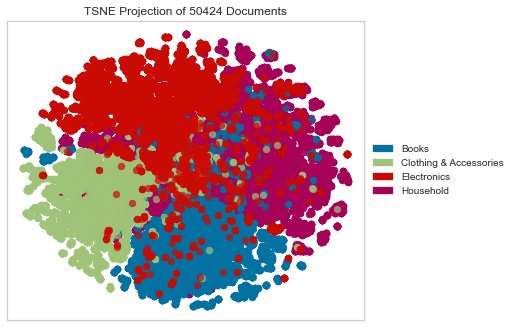

In [24]:
from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# creating the document vectors
tfidf = TfidfVectorizer()

description = tfidf.fit_transform(df["Clean_desc"])
categories_ = df["Category"]

# creating the visualizer
tsne = TSNEVisualizer()
tsne.fit_transform(description, categories_)
tsne.poof()
plt.show()

In [25]:
df.head()

,Category,Description,Clean_desc
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,paper plane design framed wall hanging motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",saf floral framed painting wood inch inch spec...
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,saf textured modern art print framed painting ...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",saf flower print framed painting synthetic inc...
4,Household,Incredible Gifts India Wooden Happy Birthday U...,incredible gift india wooden happy birthday un...


In [26]:
# Using Machine learning models on the Dataframe

In [27]:
# importing the NLTK related libraries and functions along with evaluation metircs

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [28]:
category_mapping = {  0	: "Books",
                      1	: "Electronics",
                      2	: "Household",
                      3	: "Clothing & accessories"}

In [58]:
# 1) Logistic Regression (Binary Classification Method)
def logistic_regression(x,y):
    from sklearn.linear_model import LogisticRegression

    #splitting the dataset into training and test parts
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    #bag of words implmentation
    cv = CountVectorizer()
    x_train = cv.fit_transform(x_train).toarray()

    #TF-IDF implementation
    vector = TfidfTransformer()
    x_train = vector.fit_transform(x_train).toarray()
    x_test = cv.transform(x_test)

    #fitting the training dataset to the model
    lr_model = LogisticRegression()
    lr_model.fit(x_train,y_train)
    lr_predict = lr_model.predict(x_test)
    lr_pred_prob = lr_model.predict_proba(x_test)

    #evaluation metrics for the dataset
    print("Validation Accuracy: ",accuracy_score(y_test, lr_predict))

    print("\n")
    print("*********** CONFUSION MATRIX **************")
    print(confusion_matrix(y_test,lr_predict))

    print("\n")
    print("*********** CLASSIFICATION REPORT **************")
    print(classification_report(y_test,lr_predict))

    return y_test, lr_predict, lr_pred_prob

In [30]:
# 2) Logistic Regression (Multiclass Classification Method)
def logistic_regression_multiclass(x,y):
    from sklearn.linear_model import LogisticRegression

    #splitting the dataset into training and test parts
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    #bag of words implmentation
    cv = CountVectorizer()
    x_train = cv.fit_transform(x_train).toarray()

    #TF-IDF implementation
    vector = TfidfTransformer()
    x_train = vector.fit_transform(x_train).toarray()
    x_test = cv.transform(x_test)

    reg = 0.1

    #fitting the training dataset to the multiclass classification Logistic Regression model
    lr_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=1000).fit(x_train,y_train)
    lr_predict = lr_model.predict(x_test)
    lr_pred_prob = lr_model.predict_proba(x_test)

    #evaluation metrics for the dataset
    print("Validation Accuracy: ",accuracy_score(y_test, lr_predict))

    print("\n")
    print("*********** CONFUSION MATRIX **************")
    print(confusion_matrix(y_test,lr_predict))

    print("\n")
    print("*********** CLASSIFICATION REPORT **************")
    print(classification_report(y_test,lr_predict))

    return y_test, lr_predict, lr_pred_prob

In [31]:
# 3) Multinomial Naive Bayes Classifier
def naive_bayes(x,y):
    from sklearn.naive_bayes import MultinomialNB

    #splitting the dataset into training and test parts
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    #bag of words implmentation
    cv = CountVectorizer()
    x_train = cv.fit_transform(x_train).toarray()

    #TF-IDF implementation
    vector = TfidfTransformer()
    x_train = vector.fit_transform(x_train).toarray()
    x_test = cv.transform(x_test)

    #fitting the tarining dataset to the model
    nb_model = MultinomialNB()
    nb_model.fit(x_train,y_train)
    nb_predict = nb_model.predict(x_test)
    nb_pred_prob = nb_model.predict_proba(x_test)

    #evaluation metrics for the dataset
    print("Validation Accuracy: ",accuracy_score(y_test, nb_predict))

    print("\n")
    print("*********** CONFUSION MATRIX **************")
    print(confusion_matrix(y_test,nb_predict))

    print("\n")
    print("*********** CLASSIFICATION REPORT **************")
    print(classification_report(y_test,nb_predict))

    return y_test, nb_predict, nb_pred_prob

In [32]:
# 4) Linear Support Vector Machine
def linear_svm(x,y):
    from sklearn.svm import LinearSVC

    #splitting the dataset into training and test parts
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    #bag of words implmentation
    cv = CountVectorizer()
    x_train = cv.fit_transform(x_train).toarray()

    #TF-IDF implementation
    vector = TfidfTransformer()
    x_train = vector.fit_transform(x_train).toarray()
    x_test = cv.transform(x_test)

    #fitting the training dataset to the model
    svc_model = LinearSVC(random_state=42, max_iter=2000)
    svc_model.fit(x_train,y_train)
    svc_predict = svc_model.predict(x_test)

    #evaluation metrics for the dataset
    print("Validation Accuracy: ",accuracy_score(y_test, svc_predict))

    print("\n")
    print("*********** CONFUSION MATRIX **************")
    print(confusion_matrix(y_test,svc_predict))

    print("\n")
    print("*********** CLASSIFICATION REPORT **************")
    print(classification_report(y_test,svc_predict))

    return y_test, svc_predict

In [33]:
# 5) Decision Trees Classifier
def decision_trees(x,y):
    from sklearn.tree import DecisionTreeClassifier

    #splitting the dataset into training and test parts
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    #bag of words implmentation
    cv = CountVectorizer()
    x_train = cv.fit_transform(x_train).toarray()

    #TF-IDF implementation
    vector = TfidfTransformer()
    x_train = vector.fit_transform(x_train).toarray()
    x_test = cv.transform(x_test)

    #fitting the training dataset to the model
    dtree_model = DecisionTreeClassifier(max_depth = 30)
    dtree_model.fit(x_train,y_train)
    dtree_predict = dtree_model.predict(x_test)
    dtree_pred_prob = dtree_model.predict_proba(x_test)

    #evaluation metrics for the dataset
    print("Validation Accuracy: ",accuracy_score(y_test, dtree_predict))

    print("\n")
    print("*********** CONFUSION MATRIX **************")
    print(confusion_matrix(y_test,dtree_predict))

    print("\n")
    print("*********** CLASSIFICATION REPORT **************")
    print(classification_report(y_test,dtree_predict))

    return y_test, dtree_predict, dtree_pred_prob

In [34]:
# 6) Random Forest Classifier
def random_forest(x,y):
    from sklearn.ensemble import RandomForestClassifier

    #splitting the dataset into training and test parts
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    #bag of words implmentation
    cv = CountVectorizer()
    x_train = cv.fit_transform(x_train).toarray()

    #TF-IDF implementation
    vector = TfidfTransformer()
    x_train = vector.fit_transform(x_train).toarray()
    x_test = cv.transform(x_test)

    #fitting the training dataset to the model
    rfc_model = RandomForestClassifier(random_state=42, max_depth = 30)
    rfc_model.fit(x_train,y_train)
    rfc_predict = rfc_model.predict(x_test)
    rfc_pred_prob = rfc_model.predict_proba(x_test)

    #evaluation metrics for the dataset
    print("Validation Accuracy: ",accuracy_score(y_test, rfc_predict))

    print("\n")
    print("*********** CONFUSION MATRIX **************")
    print(confusion_matrix(y_test, rfc_predict))

    print("\n")
    print("*********** CLASSIFICATION REPORT **************")
    print(classification_report(y_test, rfc_predict))

    return y_test, rfc_predict, rfc_pred_prob

In [35]:
# 7) K Nearest Neighbours
def k_nearest_neighbours(x,y):
    from sklearn.neighbors import KNeighborsClassifier

    #splitting the dataset into training and test parts
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    #bag of words implmentation
    cv = CountVectorizer()
    x_train = cv.fit_transform(x_train).toarray()

    #TF-IDF implementation
    vector = TfidfTransformer()
    x_train = vector.fit_transform(x_train).toarray()
    x_test = cv.transform(x_test)

    #fitting the training dataset to the model
    knn_model = KNeighborsClassifier(algorithm='brute')
    knn_model.fit(x_train,y_train)
    knn_predict = knn_model.predict(x_test)
    knn_pred_prob = knn_model.predict_proba(x_test)

    #evaluation metrics for the dataset
    print("Validation Accuracy: ",accuracy_score(y_test, knn_predict))

    print("\n")
    print("*********** CONFUSION MATRIX **************")
    print(confusion_matrix(y_test, knn_predict))

    print("\n")
    print("*********** CLASSIFICATION REPORT **************")
    print(classification_report(y_test, knn_predict))

    return y_test, knn_predict, knn_pred_prob

In [36]:
# Plotting the ROC Curves for Multiclass Logistic Regression
# The ROC Curves are plotted and the corresponding AUC score for each of the categories has been plotted to get an idea about the accuracy of the model. Later, an aggregate AUC Score is also calculated which an average for all the categories' One VS Rest ROC Curves.

In [37]:
def plot_roc_curve(y_test, y_pred, no_categories = 13, lw=2):

    #calculating the ROC curve and area for each class
    false_positive_rate = dict()
    true_positive_rate = dict()

    for i in range(no_categories):
        false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_test[:,i], y_pred[:, i])

    #Compute micro-average ROC curve and area under the curve
    false_positive_rate["micro"], true_positive_rate["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())

    #plotting the ROC Curves for each of the 13 main categories in our model
    for category in range(no_categories):
        plt.figure()
        plt.plot(false_positive_rate[category], 
                 true_positive_rate[category], 
                 color='deeppink',
                 lw=lw)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Primary Category: ' + category_mapping[category])
    plt.show()

In [38]:
# Evaluation of the ML Model on testing dataset
# Could not run the following cells due to hardware limitation

In [54]:
# the cleaned product description corresponds to the x value 
df['Clean_desc'] = df['Clean_desc'].astype(np.uint8, errors = 'ignore')
x = df['Clean_desc']

# the 4 labels/ product categories mentioned above correspond to the y value
df['Category'] = df['Category'].astype(np.uint8, errors = 'ignore')
y = df['Category']

In [ ]:
print("********** LOGISTIC REGRESSION **********")
y_test, lr_predict, lr_pred_prob = logistic_regression(x,y)

In [ ]:
print("********** MULTICLASS LOGISTIC REGRESSION **********")
y_test, lr_predict, lr_pred_prob = logistic_regression_multiclass(x,y)

In [ ]:
print("********* LINEAR SVM *********")
y_test, svm_predict = linear_svm(x,y)

In [ ]:
print("********** DECISION TREES CLASSIFIER *************")
y_test, dtree_predict, dtree_pred_prob = decision_trees(x,y)

In [ ]:
print("********** RANDOM FOREST CLASSIFIER *************")
y_test, rfc_predict, rfc_pred_prob = random_forest(x,y)

In [ ]:
print("********** K NEAREST NEIGHBOURS *************")
y_test, knn_predict, knn_pred_prob = k_nearest_neighbours(x,y)